<a href="https://colab.research.google.com/github/div-yansh/Scikit-Example-Datasets/blob/master/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [0]:
cancer = datasets.load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df[["TARGET"]] = pd.DataFrame(cancer.target)

In [58]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [21]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [22]:
df.shape

(569, 31)

In [23]:
df.head()

mean radius  mean texture  ...  worst fractal dimension  TARGET
0        17.99         10.38  ...                  0.11890       0
1        20.57         17.77  ...                  0.08902       0
2        19.69         21.25  ...                  0.08758       0
3        11.42         20.38  ...                  0.17300       0
4        20.29         14.34  ...                  0.07678       0

[5 rows x 31 columns]

In [0]:
sns.pairplot(df)

In [0]:
df = df.drop(["mean perimeter", "mean area", "worst perimeter", "worst area", "worst radius"], axis=1)

In [32]:
df.shape

(569, 26)

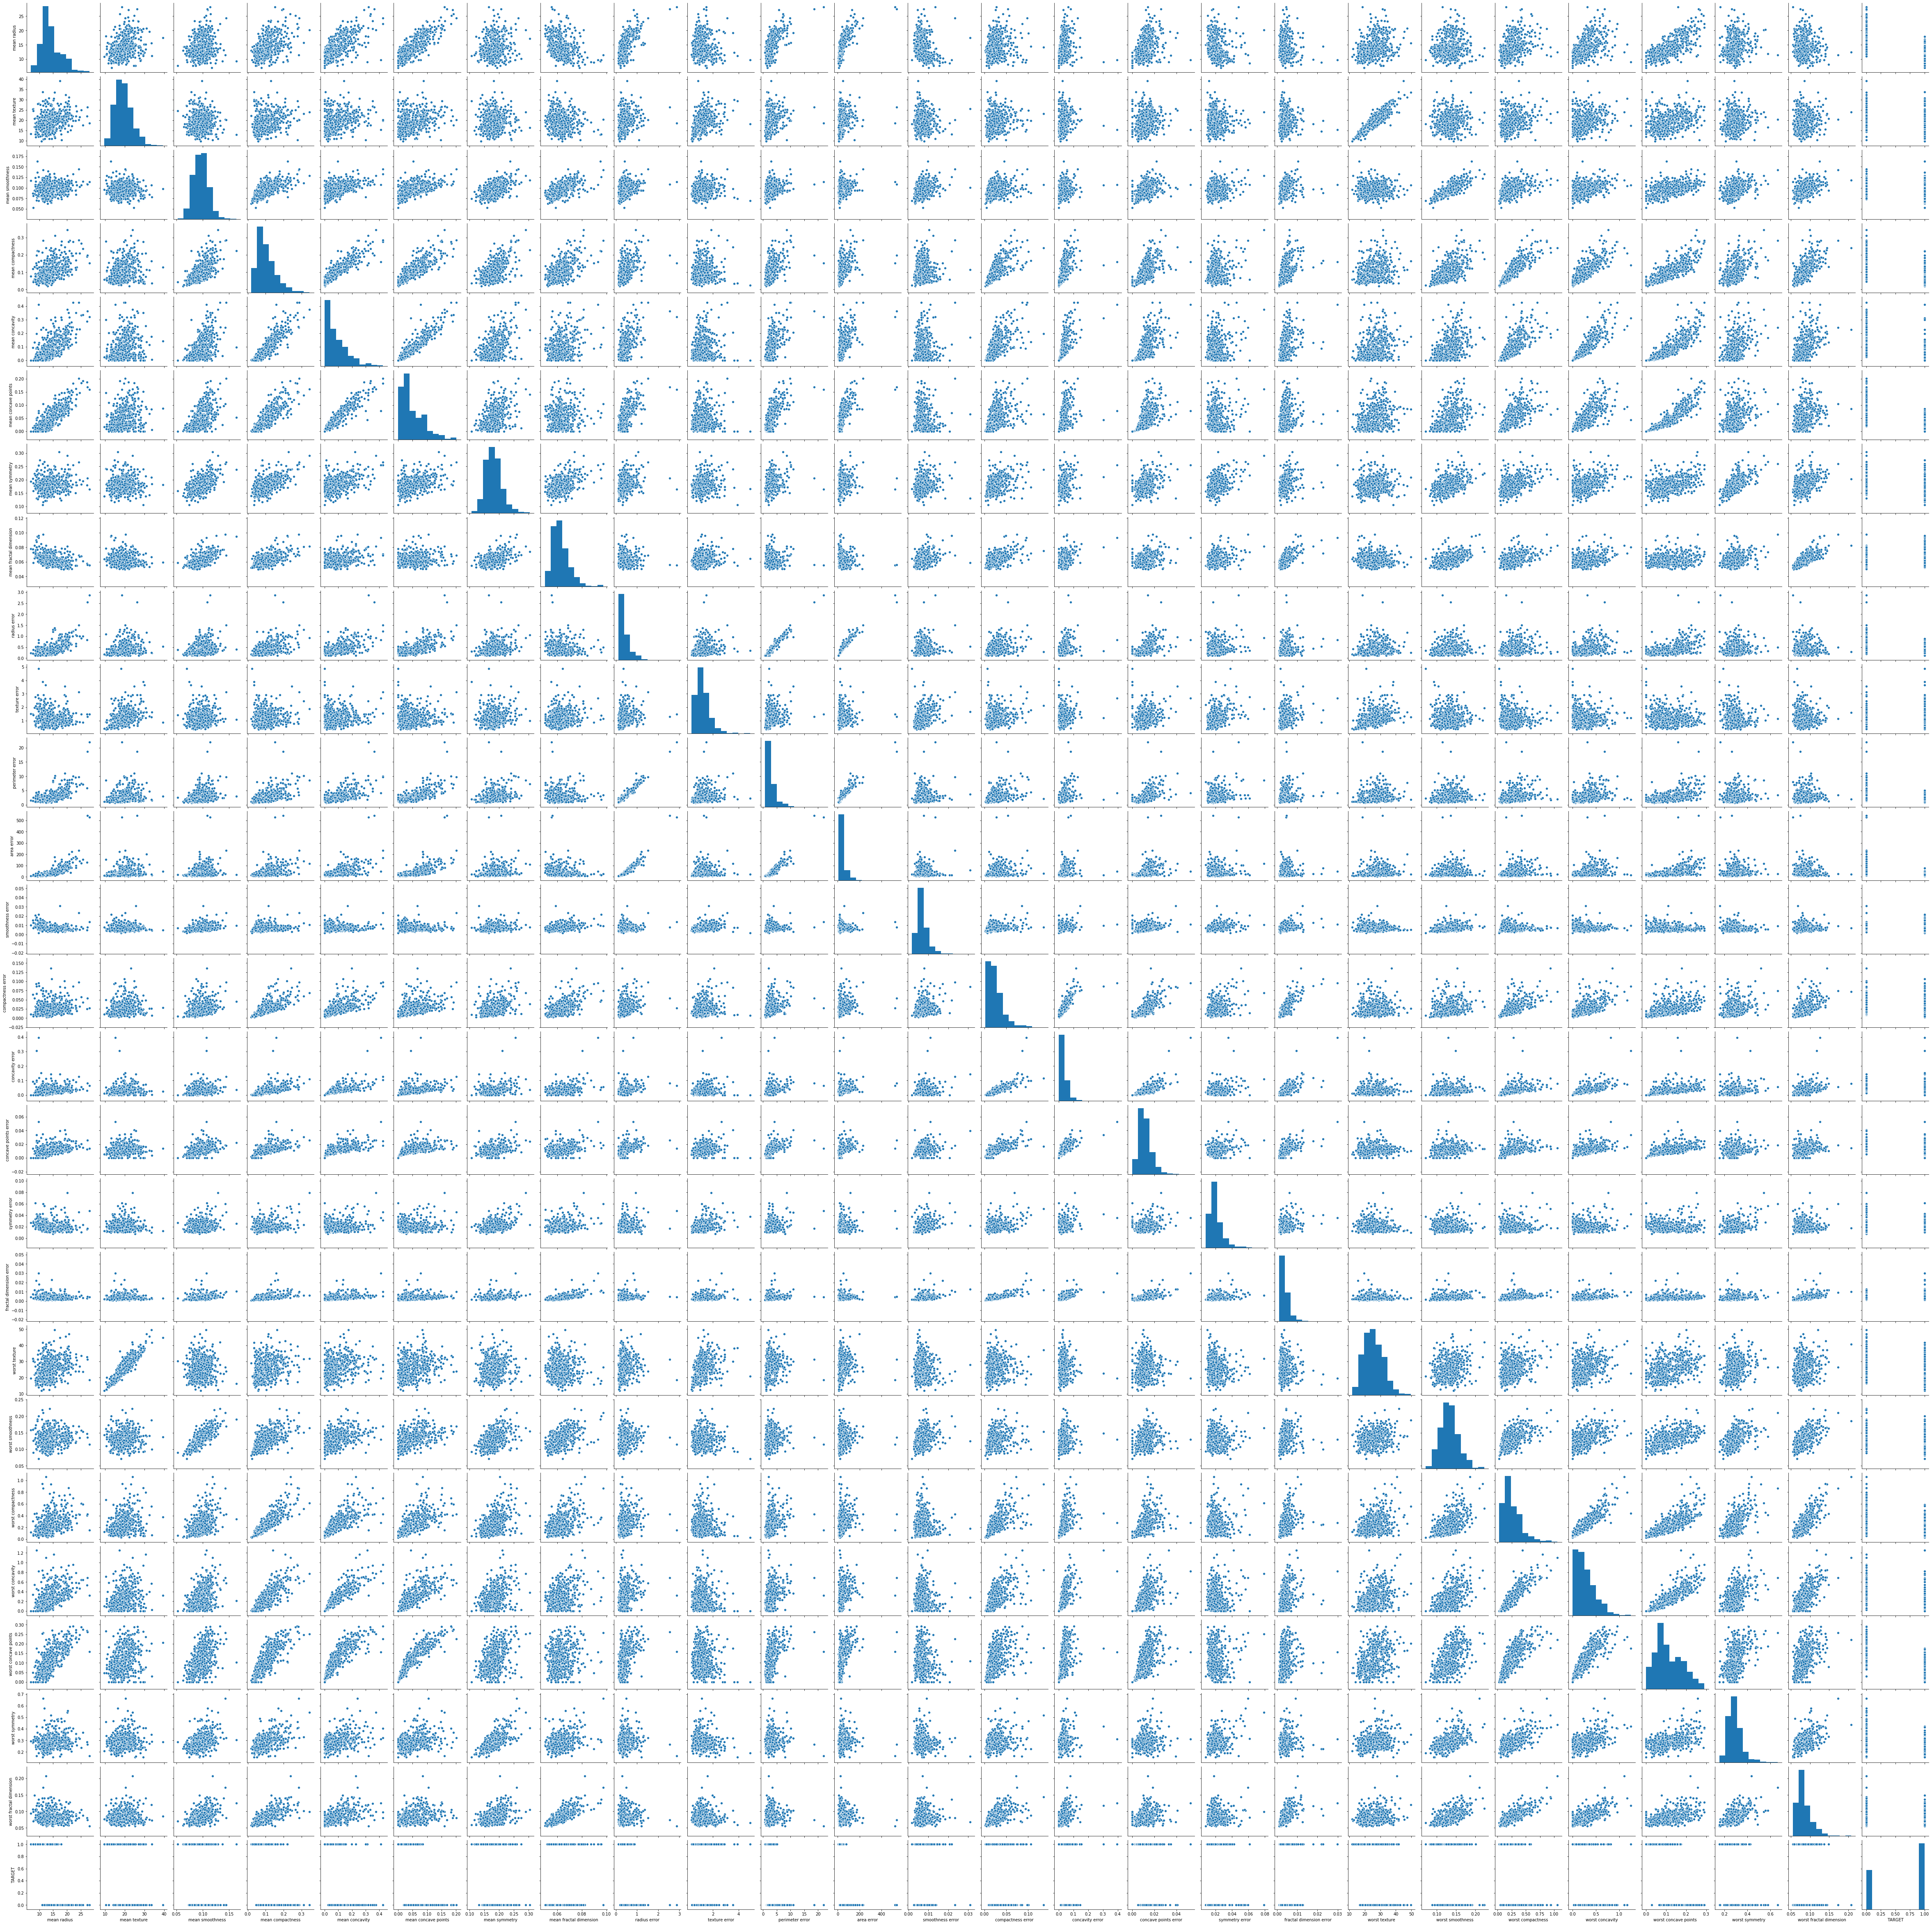

In [34]:
sns.pairplot(df)

In [40]:
X = df.drop("TARGET", axis=1)
y = df[["TARGET"]]
X.shape, y.shape

((569, 25), (569, 1))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [42]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model.score(X_train, y_train)

0.9560439560439561

In [44]:
model.score(X_test, y_test)

0.9736842105263158

In [47]:
model.coef_, model.intercept_

(array([[-0.55133126,  0.33881161, -0.25179735, -0.53245524, -0.84507363,
         -0.42654794, -0.38038948, -0.07089536,  0.00425144,  2.45935879,
         -0.33133004, -0.10576095, -0.01947491,  0.0178614 , -0.0435068 ,
         -0.03326626, -0.04141811,  0.0078752 , -0.53881345, -0.48573758,
         -1.72949004, -2.44196697, -0.91534077, -1.08772289, -0.24362502]]),
 array([19.20469406]))

In [0]:
df[["PREDICT"]] = pd.DataFrame(model.predict(X))

In [51]:
metric = confusion_matrix(df[["TARGET"]], df[["PREDICT"]])
metric

array([[197,  15],
       [  8, 349]])

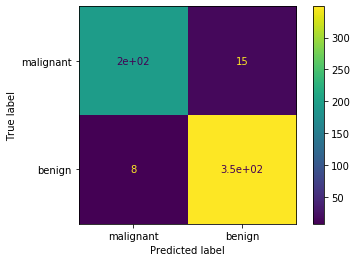

In [57]:
plot_confusion_matrix(model, X, y, display_labels=cancer.target_names)

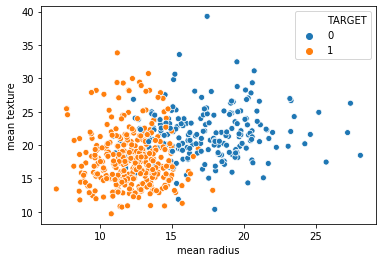

In [62]:
sns.scatterplot(x="mean radius", y="mean texture", hue="TARGET", data=df)